 
# NETWORK BIOLOGY 
  
## Assignment 1

####  Submitted By: 
#####  Divyanshu Srivastava (MT16125)


In [1]:
# Import dependencies
import numpy as np
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import itertools
from IPython.display import Image


#### Qeustion 1

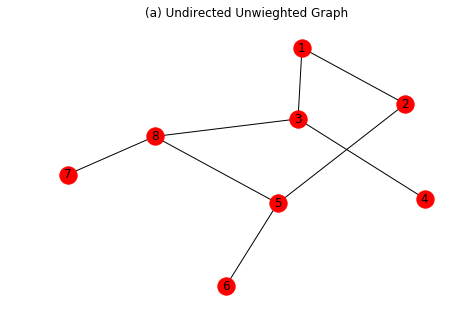

In [3]:
## Undirected Unweighted Graph
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (1, 3), (3, 4), (5, 6), (7, 8), (2, 5), (8, 3), (5, 8)])
plt.clf()

pos=nx.spring_layout(G1) # positions for all nodes
nx.draw(G1, pos)
nx.draw_networkx_labels(G1, pos)
plt.title('(a) Undirected Unwieghted Graph')
plt.show()

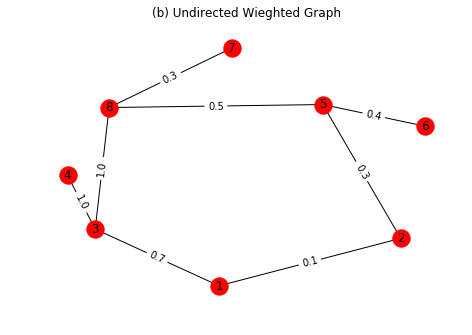

In [4]:
## Undirected Weighted Graph
G2 = nx.MultiGraph()
G2.add_weighted_edges_from([(1, 2, 0.1), (1, 3, 0.7), (3, 4, 1.0), (5, 6, 0.4), 
                            (7, 8, 0.3), (2, 5, 0.3), (8, 3, 1.0), (5, 8, 0.5)])
pos=nx.spring_layout(G2) # positions for all nodes
nx.draw(G2, pos)
edge_labels=dict([((u,v,),d['weight'])
             for u,v,d in G2.edges(data=True)])
nx.draw_networkx_edge_labels(G2,pos,edge_labels=edge_labels)
nx.draw_networkx_labels(G2, pos)
plt.title('(b) Undirected Wieghted Graph')
plt.show()

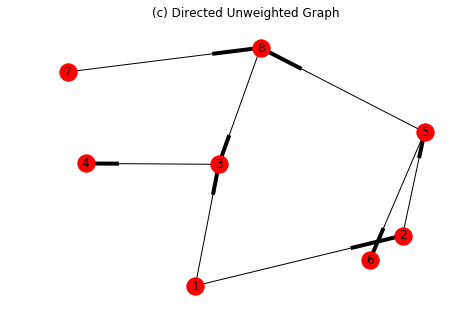

In [5]:
## Directed Unweighted Graph
G3 = nx.DiGraph()
G3.add_edges_from([(1, 2), (1, 3), (3, 4), (5, 6), (7, 8), (2, 5), (8, 3), (5, 8)])
pos=nx.spring_layout(G3) # positions for all nodes
nx.draw(G3, pos)
nx.draw_networkx_labels(G3, pos)
plt.title('(c) Directed Unweighted Graph')
plt.show()

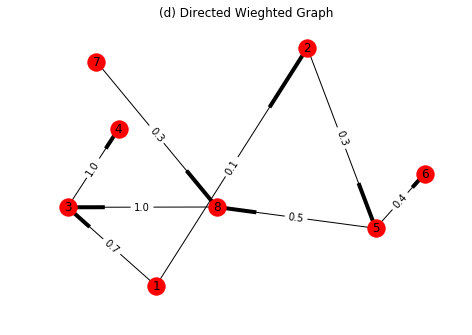

In [6]:
## Directed Weighted Graph
G4 = nx.MultiDiGraph()
G4.add_weighted_edges_from([(1, 2, 0.1), (1, 3, 0.7), (3, 4, 1.0), (5, 6, 0.4), 
                            (7, 8, 0.3), (2, 5, 0.3), (8, 3, 1.0), (5, 8, 0.5)])
pos=nx.spring_layout(G4) # positions for all nodes
nx.draw(G4, pos)
edge_labels=dict([((u,v,),d['weight'])
             for u,v,d in G4.edges(data=True)])
nx.draw_networkx_edge_labels(G4,pos,edge_labels=edge_labels)
nx.draw_networkx_labels(G4, pos)
plt.title('(d) Directed Wieghted Graph')
plt.show()

In [7]:
## Storing these graphs as adjacency matrix and adjacency list
G = {'G1 (UD-UW)': G1, 'G2 (UD-W)': G2,'G3 (D-UW)': G3,'G4 (D-W)': G4}

adjacency_matrix = dict()
edgelist = dict()
for key in G:
    adjacency_matrix[key] = nx.to_numpy_matrix(G[key])
    edgelist[key] = nx.to_edgelist(G[key])

# saving
with open('ques1_stired_networks.pickle', 'w') as f:  
    pickle.dump([adjacency_matrix, edgelist], f)


#### Qeustion 2

In [8]:
## Fuction to find degree from adjacency matrix

# function definition
def get_degree(adj):
    """
        This function computes the degree of each node for a given adjacency matrix
        For Uniderected Graphs:
            It prints node wise degree and returns it.
        For Directed Graphs:
            It prnts both in degree and out degree and reurns both of them.
    """
    if np.allclose(adj, adj.T, atol=1e-8):
        # print "Undirected Graph"
        deg = np.sum(adj != 0, axis=0)
    else:
        # print "Directed Graph"
        deg = list()
        deg.append(np.sum(adj != 0, axis=0).astype(np.int))
        deg.append(np.sum(adj != 0, axis=1).astype(np.int).T)
    return deg

# loading adjacency matrix which were saved in question 1
f = open('ques1_stired_networks.pickle', 'r')
adj_matrix, edge_list = pickle.load(f)

for key in adj_matrix:
    print key
    deg = get_degree(adj_matrix[key])
    if len(deg) == 2:
        print "Indegree: " + str(deg[0])
        print "Outdegree: " + str(deg[1])
    else:
        print "Degree: " + str(deg)

G4 (D-W)
Indegree: [[0 1 2 1 1 1 0 2]]
Outdegree: [[2 1 1 0 2 0 1 1]]
G1 (UD-UW)
Degree: [[2 2 3 1 3 1 1 3]]
G2 (UD-W)
Degree: [[2 2 3 1 3 1 1 3]]
G3 (D-UW)
Indegree: [[0 1 2 1 1 1 0 2]]
Outdegree: [[2 1 1 0 2 0 1 1]]


### Question 3

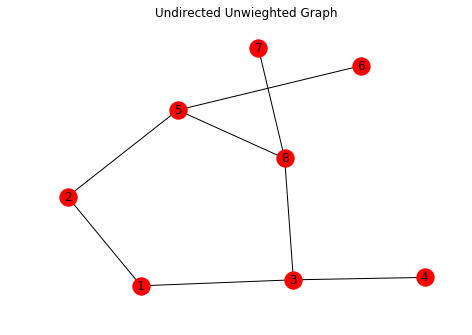

A_square : 
 [[2 0 0 1 1 0 0 1]
 [0 2 1 0 0 1 0 1]
 [0 1 3 0 1 0 1 0]
 [1 0 0 1 0 0 0 1]
 [1 0 1 0 3 0 1 0]
 [0 1 0 0 0 1 0 1]
 [0 0 1 0 1 0 1 0]
 [1 1 0 1 0 1 0 3]]


In [9]:
# Computing A square for Undirected nnweighted graph G1
A = adjacency_matrix['G1 (UD-UW)']
A = A.astype(np.int)
A_square = A*A

pos=nx.spring_layout(G1) # positions for all nodes
nx.draw(G1, pos)
nx.draw_networkx_labels(G1, pos)
plt.title('Undirected Unwieghted Graph')
plt.show()
print "A_square : \n " + np.str(A_square)

Clearly, $A^2$ as computed above for the undirected unweighted graph G1 (question 1) encodes the information of the number of paths of length 2 from each node to every other node. For Example, Cosider the pair of nodes 1 and 4. There exists a path of length 2 from node 1 to node 4 via node 3, thereby giving $A^2_{(1, 4)} = 1$ . Similarly, there exists three paths of length 2 from node 8 back to node 8, via node 3, node 5 and node 7. Thus we have $A^2_{(8, 8)} = 3$.
In general, $A^n_{(i, j)}$ gives the number of paths of length $n$ from node $i$ to node $j$ in the undirected unweighted graph.    

### Question 4

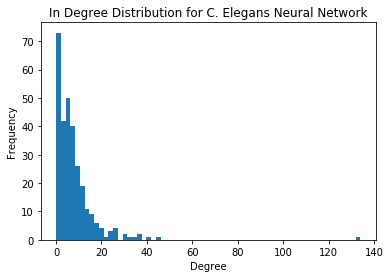

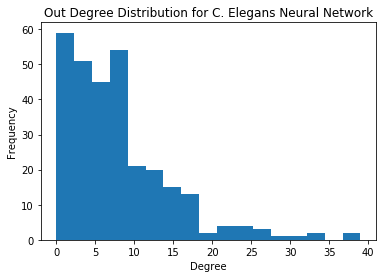

In [10]:
## Reading C. Elegans neural network dataset
G_celegans = nx.read_gml('Newman_Datasets/celegansneural/celegansneural.gml')
G_celegans_adj = nx.to_numpy_matrix(G_celegans)
G_celegans_deg = get_degree(G_celegans_adj) # function written in question 2

# Plotting
plt.hist(np.asarray(G_celegans_deg[0])[0], bins='auto')
plt.title("In Degree Distribution for C. Elegans Neural Network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

plt.hist(np.asarray(G_celegans_deg[1])[0], bins='auto')
plt.title("Out Degree Distribution for C. Elegans Neural Network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()


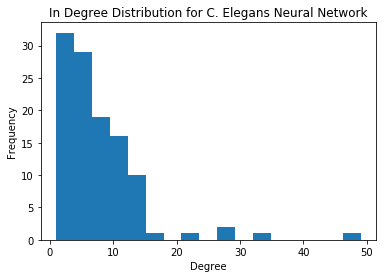

In [11]:
## Reading C. Elegans neural network dataset
G_adjnoun = nx.read_gml('Newman_Datasets/adjnoun/adjnoun.gml')
G_adjnoun_adj = nx.to_numpy_matrix(G_adjnoun)
G_adjnoun_deg = get_degree(G_adjnoun_adj) # function written in question 2

# Plotting
plt.hist(np.asarray(G_adjnoun_deg[0])[0], bins='auto')
plt.title("In Degree Distribution for C. Elegans Neural Network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()


### Question 5


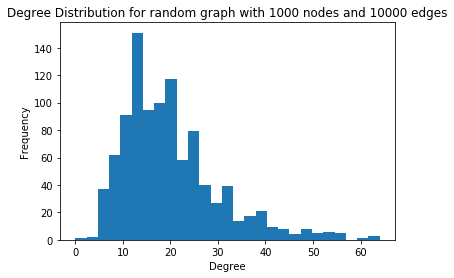

In [12]:
## Random Undirected Unweighted Graph

def create_random_graph(n, e):
    """
        This function creates a random adjacncy matrix for a simple 
        undirected unweighted graph with n nodes and e edges.
        It returns the randomly computed adjacency matrix.
    """
    adj = np.zeros((n, n))
    edges = 0;
    while edges < e:
        i = np.random.randint(0, n-2)
        j = np.random.randint(i+1, n-1)
        if (adj[i][j] == 1):
            continue
        adj[i][j] = 1
        edges = edges+1
    adj = adj + adj.T
    return adj

n = 1000
e = 10000

adj = create_random_graph(n, e)
deg = get_degree(adj)

# degree distribution
plt.clf()
plt.hist(deg, bins='auto')
plt.title("Degree Distribution for random graph with " + str(n) + " nodes and " + str(e) + " edges")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

### Question 6

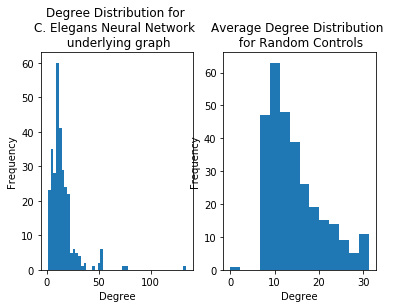

In [13]:
## Comparing C elegans neural network with random controls
# creating underlyting graph for directed graph
G_celegans_underlying_adj = G_celegans_adj + G_celegans_adj.T
G_celegans_underlying_adj[np.matrix.nonzero(G_celegans_underlying_adj)] = 1
G_celegans_underlying_deg = get_degree(G_celegans_underlying_adj)

nodes = len(G_celegans_underlying_adj)
edges = np.sum(G_celegans_underlying_adj)/2

n = 100

random_degs = np.empty([n, nodes])

for i in range(0, n):
    random_degs[i] = get_degree(create_random_graph(nodes, edges)) 

random_avg_degs = np.mean(random_degs, axis=0)


plt.clf()
plt.subplot(121)
plt.hist(np.asarray(G_celegans_underlying_deg[0])[0], bins='auto')
plt.title("Degree Distribution for \nC. Elegans Neural Network \n underlying graph")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.subplot(122)
plt.hist(random_avg_degs, bins='auto')
plt.title("Average Degree Distribution \n for Random Controls")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

As seen from above figures, real world networks show power law nature for degree distribution, while random graphs show more like a poisson distribution of degree over nodes. Similar results can be seen for adjacency network of common adjectives and nouns.

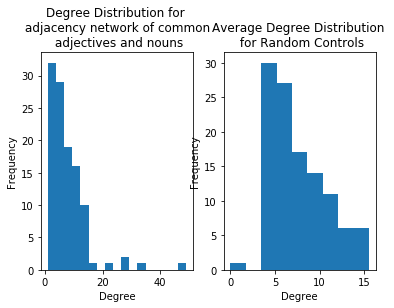

In [14]:
nodes = len(G_adjnoun_adj)
edges = np.sum(G_adjnoun_adj)/2

n = 100

random_degs = np.empty([n, nodes])

for i in range(0, n):
    random_degs[i] = get_degree(create_random_graph(nodes, edges)) 

random_avg_degs = np.mean(random_degs, axis=0)


plt.clf()
plt.subplot(121)
plt.hist(np.asarray(G_adjnoun_deg[0])[0], bins='auto')
plt.title("Degree Distribution for \n adjacency network of common \n adjectives and nouns")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.subplot(122)
plt.hist(random_avg_degs, bins='auto')
plt.title("Average Degree Distribution \n for Random Controls")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

### Question 7

In [ ]:
## No codes in this question. Cytoscape was used to read and display thee two real world netowrks.



#### C. Elegans Neural Network

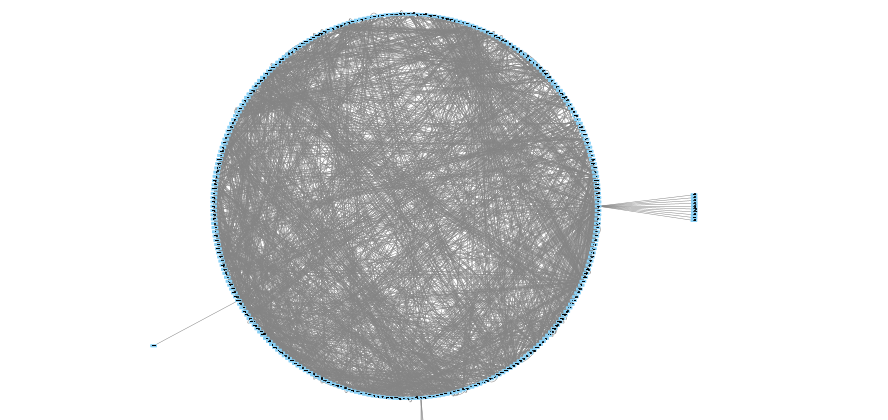

In [15]:
Image(filename='Newman_Datasets/celegansneural/celegansneural.gml.png') 

#### Adjacent nouns and words network

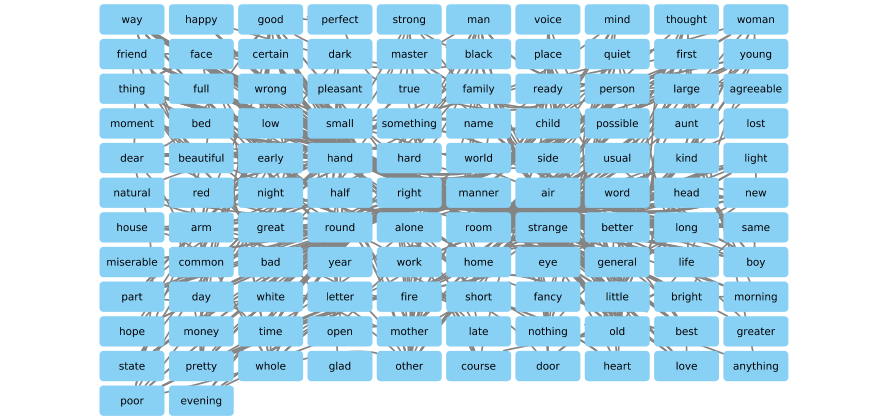

In [16]:
Image(filename='Newman_Datasets/adjnoun/adjnoun.gml.png')

### Question 8

In [17]:
## Clustering Coefficient and Average custering coefficient

def get_clust_coeff(adj, n):
    """
        This Function computes clustering coefficient of the node n
        in the graph defined by adjacency matrix adj
    """
    n_deg = np.sum(adj, axis=0)[0, n]
    if (n_deg < 2):
        return 0
    neighbours = np.nonzero(adj[:, n])[0]
    neighbour_pairs = itertools.combinations(neighbours, 2)
    triangles = 0
    for i in neighbour_pairs:
        if adj[i[0], i[1]] == 1:
            triangles += 1    
    clust_coeff = (float) (triangles / (n_deg*(n_deg-1)/2))
    return clust_coeff

def get_avg_clust_coeff(adj):
    """
        This function computes average clustering coefficient of a graph respresented 
        from its adjacency matrix adj
    """
    nodes = len(adj)
    clust_coeffs = np.zeros([1, nodes])[0]
    for i in range(0, nodes):
        clust_coeffs[i] = get_clust_coeff(adj, i)
    avg_clust_coeff = np.mean(clust_coeffs)
    return avg_clust_coeff
    
# Using adjacent nouns and words undirected graph for validation
adj = G_adjnoun_adj
print "Nodewise Clustering Coefficients (for first 10 nodes: "
for i in range(0, 10):
    print "\tNode "+ str(i) + ": \t" + str(get_clust_coeff(adj, i))
print "Average Clustering Coefficient (Using function): " + str(get_avg_clust_coeff(G_adjnoun_adj))
print "Average Clustering Coefficient (Using NetworkX): " + str(nx.average_clustering(G_adjnoun))

Nodewise Clustering Coefficients (for first 10 nodes: 
	Node 0: 	0.666666666667
	Node 1: 	0.153846153846
	Node 2: 	0.132575757576
	Node 3: 	0.194444444444
	Node 4: 	0.0
	Node 5: 	0.285714285714
	Node 6: 	0.266666666667
	Node 7: 	0.290909090909
	Node 8: 	0
	Node 9: 	0.102941176471
Average Clustering Coefficient (Using function): 0.17284007981
Average Clustering Coefficient (Using NetworkX): 0.17284007981


### Question 9

In [18]:
## Finding All Pair Shortest Path using Floyd Warshall Algorithm for the aadjacent nouns and adjectives network

def floyd_warshall(adj):
    """
        This function computes all pair shortest path for the adjacency matrix adj
    """
    shortest_paths = adj
    shortest_paths[shortest_paths == 0] = np.inf
    shortest_paths[np.diag_indices_from(shortest_paths)] = 0
    
    nodes = len(adj)
    for k in range(nodes):
        for i in range(nodes):
            for j in range(nodes):
                shortest_paths[i, j] = min(shortest_paths[i, j] , shortest_paths[i, k]+ shortest_paths[k, j])
    
    return shortest_paths

    
adj = G_adjnoun_adj
all_pair_shortest_paths = floyd_warshall(adj)
print "All Pair Shortest path Matrix: \n" + str(all_pair_shortest_paths)
print "\nCharacteristic path length (Self-Computed): \t" + str(np.sum(all_pair_shortest_paths) / (nodes*nodes - nodes))
print "Characteristic path length (Using NetworkX): \t" + str(nx.average_shortest_path_length(G_adjnoun))

All Pair Shortest path Matrix: 
[[ 0.  1.  1. ...,  4.  4.  2.]
 [ 1.  0.  1. ...,  4.  4.  2.]
 [ 1.  1.  0. ...,  3.  3.  1.]
 ..., 
 [ 4.  4.  3. ...,  0.  2.  4.]
 [ 4.  4.  3. ...,  2.  0.  4.]
 [ 2.  2.  1. ...,  4.  4.  0.]]

Characteristic path length (Self-Computed): 	2.53555341055
Characteristic path length (Using NetworkX): 	2.53555341055
